基本的にはランダムウォークみたいな感じ．ただ，，中心から離れようとするとペナルティーがあるので，なんとなく中心付近に集まっている．みたいな．目的は，衝突判定を入れてアユにシミュレーションレベルの難易度のプログラムを書くこと．粒子の動きのルールをあとで差し替えれば，ある程度実用に耐えるのではと．

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import numpy.random as rnd
import random as random
import math
from statistics import mean,median,variance,stdev
from IPython.display import HTML

rnd.seed(seed=123456789)
N=700 # 粒子数
TIME=200 # 繰返し回数
K=0.04 # 距離のペナルティ係数
K2=0.1 # 速さのペナルティ係数
RADIUS=0.5 # 粒子の半径．xy座標と同じ単位．てきとう
PROB_INFECT=0.5 # 接触時に移る確率
PROB_RECOV=0.01 # 自然に治る確率

In [0]:
def plot(x,y,color):
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    return plt.scatter(x,y,alpha=0.3,color=color)

In [3]:
px=[]
py=[]

dist=[]
px.append(list(rnd.normal(0,10,size=N))) # 平均0、標準偏差10の正規分布
py.append(list(rnd.normal(0,10,size=N))) # 平均0、標準偏差10の正規分布
dist.append([math.sqrt(px[-1][i]**2+py[-1][i]**2) for i in range(N)])

S=[1 for i in range(N-10)]+[0 for i in range(N-10,N)]
I=[0 for i in range(N-10)]+[1 for i in range(N-10,N)]
R=[0 for i in range(N)]

data={"S": [0 for i in range(TIME)], # # of S
      "I": [0 for i in range(TIME)], # # of I
      "R": [0 for i in range(TIME)]} # # of R
print(0,data["S"][0],data["I"][0],data["R"][0])

for t in range(0,TIME):
    #print(t)
    tmpx=[]
    tmpy=[]
    tmpdist=[]
    for i in range(N): #粒子iについて
        #移動
        dx = rnd.randn(1) - px[t][i]*K # +標準正規分布乱数-中心からの距離に比例するバネっぽい力
        dy = rnd.randn(1) - py[t][i]*K # +標準正規分布乱数-中心からの距離に比例するバネっぽい力
        dx = dx - dx*K2 # -なんか速度に比例する抵抗力
        dy = dy - dy*K2 # -なんか速度に比例する抵抗力
        tmpx.append(px[t][i] + dx)
        tmpy.append(py[t][i] + dy)
        if(tmpx[-1]<-50 or 50<tmpx[-1] or tmpy[-1]<-50 or 50<tmpy[-1]):
            #範囲外に出たらてきとうにぶっ飛ばす
            tmpx[-1]=rnd.normal(0,10)
            tmpy[-1]=rnd.normal(0,10)
        tmpdist.append(math.sqrt(tmpx[-1]**2+tmpx[-1]**2))

        #接触判定
        for j in range(N): #粒子jについて
            if(i!=j and I[i]==1):
                d=math.sqrt((px[t][i]-px[t][j])**2+(py[t][i]-py[t][j])**2)
                if(d<RADIUS):
                    #print(i,j,d,"hit!",S[j],R[j])
                    if(S[j]==1 and R[j]==0 and rnd.rand()<PROB_INFECT):
                        S[j]=0
                        I[j]=1
                        R[j]=0
                        print(t,i,j,d,"NEW INFECTION!")

        #recover
        if(I[i]==1 and rnd.rand()<PROB_RECOV):
            S[i]=0
            I[i]=0
            R[i]=1

    data["S"][t]=sum(S)
    data["I"][t]=sum(I)
    data["R"][t]=sum(R)
    print(t,data["S"][t],data["I"][t],data["R"][t])
    #print(S)
    #print(I)
    #print(R)

    px.insert(t+1, tmpx)
    py.insert(t+1, tmpy)
    dist.insert(t+1, tmpdist)



0 0 0 0
0 691 235 0.25106640649025264 NEW INFECTION!
0 691 349 0.32282948737860434 NEW INFECTION!
0 699 558 0.43269568511137807 NEW INFECTION!
0 687 13 0
1 235 371 0.1281756480069149 NEW INFECTION!
1 691 566 0.18682790850277828 NEW INFECTION!
1 695 606 0.3766922167210979 NEW INFECTION!
1 696 190 0.45921328880658424 NEW INFECTION!
1 683 15 2
2 566 417 0.33791376526638583 NEW INFECTION!
2 682 16 2
3 190 437 0.40057608740132156 NEW INFECTION!
3 235 197 0.4919273216386547 NEW INFECTION!
3 371 519 0.40806991977189344 NEW INFECTION!
3 437 75 0.4525938906888621 NEW INFECTION!
3 566 662 0.21258611682472123 NEW INFECTION!
3 691 106 0.27825297689831413 NEW INFECTION!
3 676 22 2
4 75 375 0.45170532801913066 NEW INFECTION!
4 235 288 0.19089700365146442 NEW INFECTION!
4 288 302 0.47609367386421314 NEW INFECTION!
4 371 652 0.49036955125296633 NEW INFECTION!
4 417 9 0.4328045098681213 NEW INFECTION!
4 437 353 0.4391006530934917 NEW INFECTION!
4 437 450 0.4434761907297949 NEW INFECTION!
4 450 160 0.40

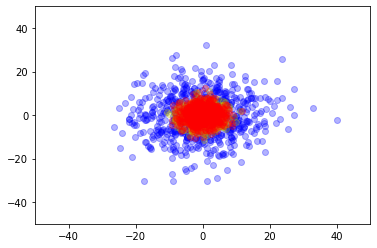

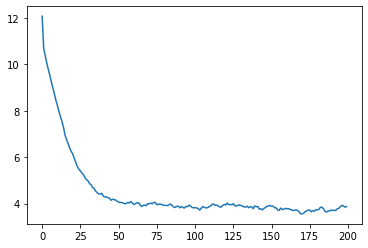

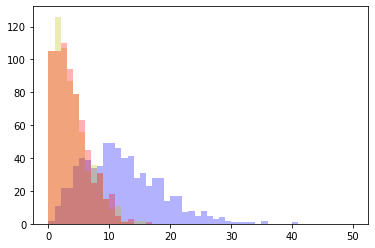

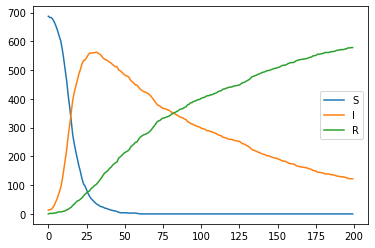

In [4]:
# 2次元平面上の粒子の位置(t=0,TIME/2,TIME)
plot(px[0],py[0],color='b')
plot(px[TIME//2],py[TIME//2],color='y')
plot(px[-1],py[-1],color='r')
plt.show()

#anime?
fig, ax = plt.subplots()
plt.close()
plots=[]
for t in range(0,TIME,10):
    p =ax.plot(px[t],py[t],alpha=0.3,color='b')
    plots.append(p)
ani = animation.ArtistAnimation(fig, plots, interval=100, blit=True)# 100ms ごとに表示
rc('animation', html='jshtml')
ani

# 中心からの距離の時間変化
m=[sum(dist[t])/N for t in range(TIME)]
plt.plot(m)
plt.show()

# t=0,TIME/2,TIMEのときの2次元平面の中央からの距離(ヒストグラム)
plt.hist(dist[0],bins=50,range=(0,50),alpha=0.3,color='b')
plt.hist(dist[TIME//2],bins=50,range=(0,50),alpha=0.3,color='y')
plt.hist(dist[TIME-1],bins=50,range=(0,50),alpha=0.3,color='r')
plt.show()


plt.plot(data["S"],label="S")
plt.plot(data["I"],label="I")
plt.plot(data["R"],label="R")
plt.legend()
plt.show()